<a href="https://colab.research.google.com/github/AshwinUniyal/ML_Project/blob/main/ML_Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. tabular dataset

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from pmlb import fetch_data
from sklearn.linear_model import LinearRegression


In [ ]:
data = fetch_data('fars')
print(data.describe())

          CASE_STATE            AGE            SEX    PERSON_TYPE  \
count  100968.000000  100968.000000  100968.000000  100968.000000   
mean       23.425977      37.106707       0.683880       3.155832   
std        15.228212      22.109641       0.498972       2.551538   
min         0.000000       0.000000       0.000000       0.000000   
25%         9.000000      20.000000       0.000000       1.000000   
50%        22.000000      32.000000       1.000000       1.000000   
75%        38.000000      49.000000       1.000000       6.000000   
max        50.000000      99.000000       2.000000       9.000000   

       SEATING_POSITION  RESTRAINT_SYSTEM-USE  \
count     100968.000000         100968.000000   
mean           5.990700              6.400394   
std            4.794034              1.900097   
min            0.000000              0.000000   
25%            3.000000              5.000000   
50%            3.000000              7.000000   
75%            6.000000            

### checking freq of classes

In [ ]:
pd.value_counts(data.target)

1    42116
4    20007
2    15072
5    13890
6     8674
7      901
3      299
0        9
Name: target, dtype: int64

### under / over sampling may be required 

In [ ]:
X, y = fetch_data('fars', return_X_y = True)

In [ ]:
X.size

2928072

In [ ]:
y.size

100968

In [ ]:
X

array([[ 0, 34,  1, ..., 29, 19, 17],
       [ 0, 20,  1, ..., 29, 19, 17],
       [ 0, 43,  1, ..., 29, 19,  4],
       ...,
       [50,  7,  0, ..., 29, 19, 11],
       [50,  4,  0, ..., 29, 19, 11],
       [50, 61,  1, ..., 29, 19, 17]], dtype=int64)

In [ ]:
X[[0]]

array([[  0,  34,   1,   1,   3,   7,   2,   2,   9,   1,  16,   3,   2,
          9,  97,   3,   3,   5, 999,   2,   0,   2,   0,   5,   0,  27,
         29,  19,  17]], dtype=int64)

In [ ]:
data.iloc[1]

CASE_STATE                              0
AGE                                    20
SEX                                     1
PERSON_TYPE                             1
SEATING_POSITION                        3
RESTRAINT_SYSTEM-USE                    7
AIR_BAG_AVAILABILITY/DEPLOYMENT         9
EJECTION                                2
EJECTION_PATH                           9
EXTRICATION                             1
NON_MOTORIST_LOCATION                  16
POLICE_REPORTED_ALCOHOL_INVOLVEMENT     0
METHOD_ALCOHOL_DETERMINATION            2
ALCOHOL_TEST_TYPE                       4
ALCOHOL_TEST_RESULT                    96
POLICE-REPORTED_DRUG_INVOLVEMENT        1
METHOD_OF_DRUG_DETERMINATION            3
DRUG_TEST_TYPE                          2
DRUG_TEST_RESULTS_(1_of_3)              0
DRUG_TEST_TYPE_(2_of_3)                 2
DRUG_TEST_RESULTS_(2_of_3)              0
DRUG_TEST_TYPE_(3_of_3)                 2
DRUG_TEST_RESULTS_(3_of_3)              0
HISPANIC_ORIGIN                   

In [ ]:
data.shape

(100968, 30)

### checking missing values in dataframe

In [ ]:
data.isnull().sum()

CASE_STATE                             0
AGE                                    0
SEX                                    0
PERSON_TYPE                            0
SEATING_POSITION                       0
RESTRAINT_SYSTEM-USE                   0
AIR_BAG_AVAILABILITY/DEPLOYMENT        0
EJECTION                               0
EJECTION_PATH                          0
EXTRICATION                            0
NON_MOTORIST_LOCATION                  0
POLICE_REPORTED_ALCOHOL_INVOLVEMENT    0
METHOD_ALCOHOL_DETERMINATION           0
ALCOHOL_TEST_TYPE                      0
ALCOHOL_TEST_RESULT                    0
POLICE-REPORTED_DRUG_INVOLVEMENT       0
METHOD_OF_DRUG_DETERMINATION           0
DRUG_TEST_TYPE                         0
DRUG_TEST_RESULTS_(1_of_3)             0
DRUG_TEST_TYPE_(2_of_3)                0
DRUG_TEST_RESULTS_(2_of_3)             0
DRUG_TEST_TYPE_(3_of_3)                0
DRUG_TEST_RESULTS_(3_of_3)             0
HISPANIC_ORIGIN                        0
TAKEN_TO_HOSPITA

### no missing values found. we are good to go

### FIND CORRELATIONS - one on one , Creating sns heatmap

<AxesSubplot:>

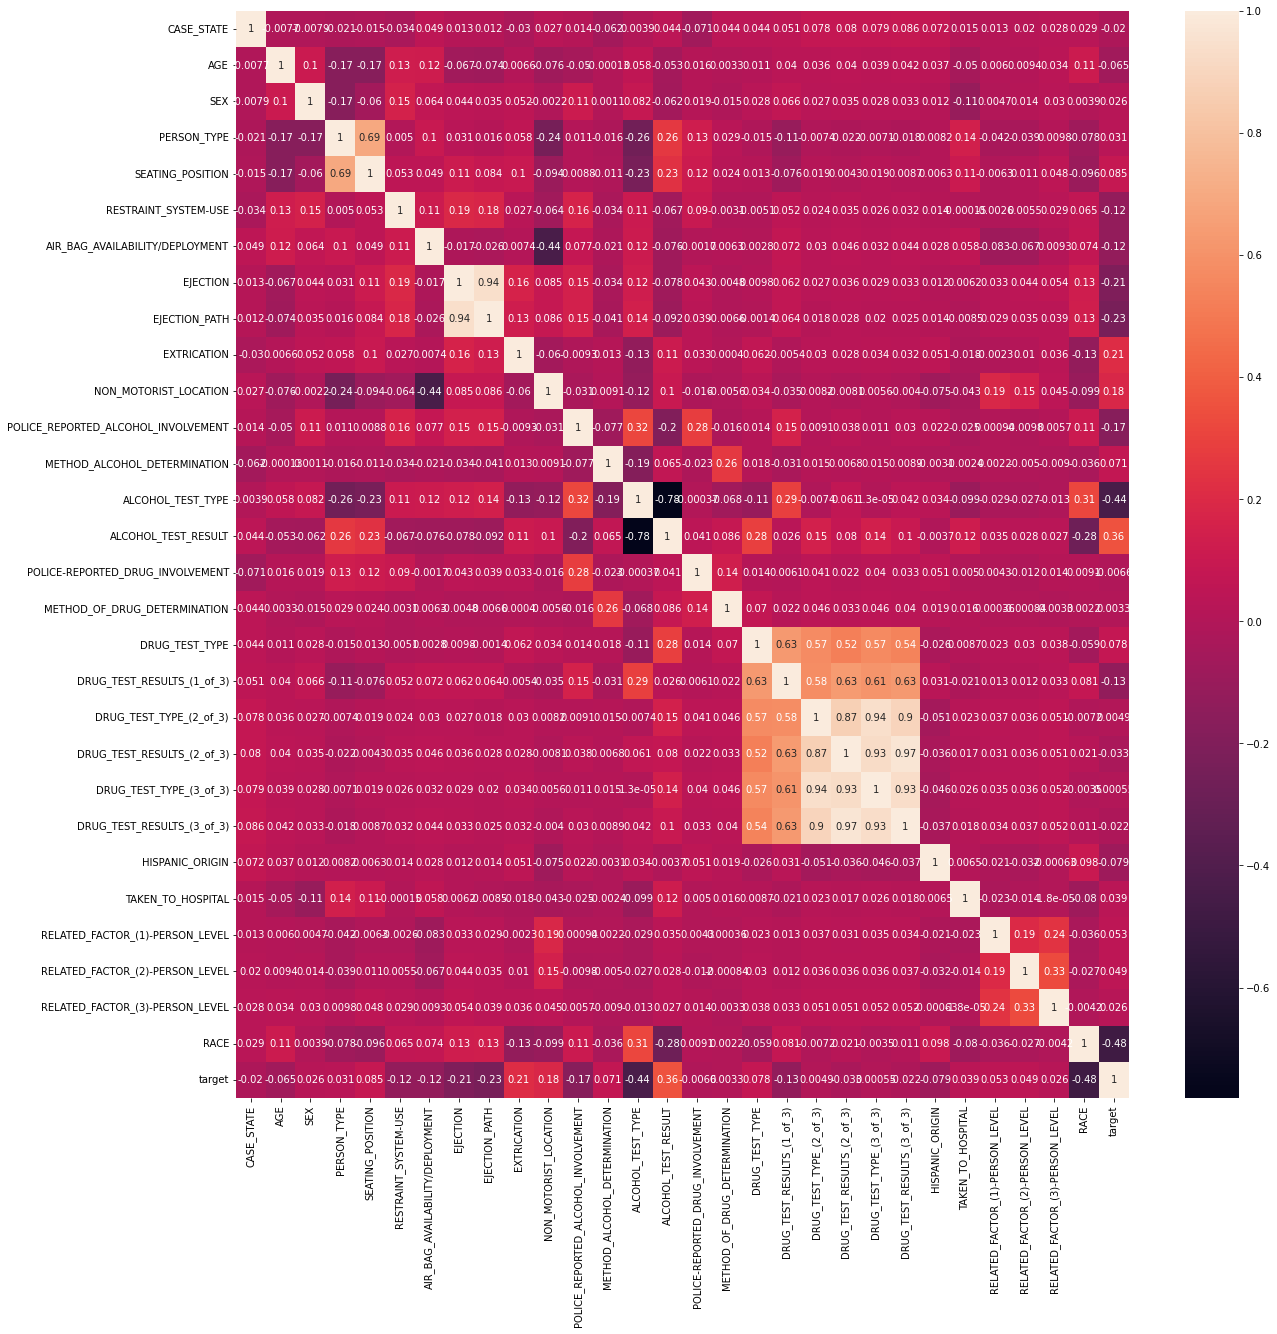

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True)

In [ ]:
### race and alcohol test type are coming biggest factor for high severity of accidents

In [ ]:
### checking duplicates

dup_rows = data.duplicated(keep = False)
print(dup_rows)

0         False
1         False
2         False
3         False
4         False
          ...  
100963    False
100964    False
100965    False
100966    False
100967    False
Length: 100968, dtype: bool


In [ ]:
dup_rows.size

100968

In [ ]:
data[data.duplicated(keep = 'first')]

,CASE_STATE,AGE,SEX,PERSON_TYPE,SEATING_POSITION,RESTRAINT_SYSTEM-USE,AIR_BAG_AVAILABILITY/DEPLOYMENT,EJECTION,EJECTION_PATH,EXTRICATION,...,DRUG_TEST_RESULTS_(2_of_3),DRUG_TEST_TYPE_(3_of_3),DRUG_TEST_RESULTS_(3_of_3),HISPANIC_ORIGIN,TAKEN_TO_HOSPITAL,RELATED_FACTOR_(1)-PERSON_LEVEL,RELATED_FACTOR_(2)-PERSON_LEVEL,RELATED_FACTOR_(3)-PERSON_LEVEL,RACE,target
69,0,1,1,6,16,1,4,0,0,1,...,0,2,0,6,2,27,29,19,11,2
126,0,99,2,6,6,5,4,0,0,1,...,0,2,0,6,0,27,29,19,11,4
170,0,99,2,6,6,5,4,0,0,1,...,0,2,0,6,0,27,29,19,11,4
173,0,32,0,1,3,5,4,0,0,1,...,0,2,0,6,2,27,29,19,11,2
225,0,1,1,6,16,1,4,0,0,1,...,0,2,0,6,2,27,29,19,11,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100539,49,20,1,1,3,5,4,0,0,1,...,0,2,0,6,0,27,29,19,11,4
100542,49,32,0,1,3,5,9,0,0,1,...,0,2,0,6,2,27,29,19,11,2
100786,50,46,1,1,3,5,4,0,0,1,...,0,2,0,6,0,27,29,19,11,4
100855,50,39,1,1,3,5,4,0,0,1,...,0,2,0,6,0,27,29,19,11,4


In [ ]:
data_dup = data[data.duplicated(keep=False)]

dup_indexes = data_dup.groupby(list(data_dup)).apply(lambda x: tuple(x.index)).tolist()
print (dup_indexes)
[(1, 6), (2, 4), (3, 5)]

[(797, 1158), (31, 69, 225, 2084), (462, 792), (1159, 1173, 1965), (516, 518), (782, 1792), (1791, 1820), (459, 534), (50, 1745, 2106), (135, 974), (1209, 1212), (205, 2140), (485, 838, 2077), (1210, 1213), (1108, 1648), (1671, 1787), (454, 458), (460, 461), (1438, 1944), (1621, 1622), (362, 916), (1181, 2262), (1731, 1839), (229, 444, 1349), (184, 1836), (709, 1232, 1350, 1661), (1440, 1483), (586, 587), (897, 2120), (513, 1145), (463, 1337), (1116, 1508), (2113, 2115), (718, 927), (598, 1284), (1300, 2080), (1125, 1522), (332, 1551), (48, 1370, 1538), (1058, 1722), (417, 1443), (1494, 2044), (272, 1710), (62, 1421), (1611, 2058), (99, 254), (1069, 1094), (1330, 1397), (174, 1110), (400, 561), (20, 673, 854, 1063), (1429, 1668), (220, 562), (883, 1055), (52, 296), (107, 173), (437, 557, 599), (650, 695, 1075, 2149), (738, 822), (29, 969), (431, 2050), (44, 1803), (2078, 2249), (397, 1259, 2196), (850, 1025), (563, 1135), (303, 1113, 1995), (5, 2233), (530, 1523, 1909), (288, 450, 1072

[(1, 6), (2, 4), (3, 5)]

In [ ]:
data.iloc[31,]

CASE_STATE                              0
AGE                                     1
SEX                                     1
PERSON_TYPE                             6
SEATING_POSITION                       16
RESTRAINT_SYSTEM-USE                    1
AIR_BAG_AVAILABILITY/DEPLOYMENT         4
EJECTION                                0
EJECTION_PATH                           0
EXTRICATION                             1
NON_MOTORIST_LOCATION                  16
POLICE_REPORTED_ALCOHOL_INVOLVEMENT     1
METHOD_ALCOHOL_DETERMINATION            2
ALCOHOL_TEST_TYPE                       4
ALCOHOL_TEST_RESULT                    96
POLICE-REPORTED_DRUG_INVOLVEMENT        2
METHOD_OF_DRUG_DETERMINATION            3
DRUG_TEST_TYPE                          2
DRUG_TEST_RESULTS_(1_of_3)              0
DRUG_TEST_TYPE_(2_of_3)                 2
DRUG_TEST_RESULTS_(2_of_3)              0
DRUG_TEST_TYPE_(3_of_3)                 2
DRUG_TEST_RESULTS_(3_of_3)              0
HISPANIC_ORIGIN                   

In [ ]:
data_dup.shape

(12768, 30)

In [ ]:
data.shape

(100968, 30)

In [ ]:
data_dup_removed = data.drop_duplicates()

In [ ]:
data_dup_removed.shape

(93004, 30)

### 7964 duplicate rows have been deleted

In [ ]:
data.columns

Index(['CASE_STATE', 'AGE', 'SEX', 'PERSON_TYPE', 'SEATING_POSITION',
       'RESTRAINT_SYSTEM-USE', 'AIR_BAG_AVAILABILITY/DEPLOYMENT', 'EJECTION',
       'EJECTION_PATH', 'EXTRICATION', 'NON_MOTORIST_LOCATION',
       'POLICE_REPORTED_ALCOHOL_INVOLVEMENT', 'METHOD_ALCOHOL_DETERMINATION',
       'ALCOHOL_TEST_TYPE', 'ALCOHOL_TEST_RESULT',
       'POLICE-REPORTED_DRUG_INVOLVEMENT', 'METHOD_OF_DRUG_DETERMINATION',
       'DRUG_TEST_TYPE', 'DRUG_TEST_RESULTS_(1_of_3)',
       'DRUG_TEST_TYPE_(2_of_3)', 'DRUG_TEST_RESULTS_(2_of_3)',
       'DRUG_TEST_TYPE_(3_of_3)', 'DRUG_TEST_RESULTS_(3_of_3)',
       'HISPANIC_ORIGIN', 'TAKEN_TO_HOSPITAL',
       'RELATED_FACTOR_(1)-PERSON_LEVEL', 'RELATED_FACTOR_(2)-PERSON_LEVEL',
       'RELATED_FACTOR_(3)-PERSON_LEVEL', 'RACE', 'target'],
      dtype='object')

In [ ]:
df = data_dup_removed
X = df.loc[:,df.columns != 'target']
y = df.loc[:,df.columns == 'target']

In [ ]:
X.shape

(93004, 29)

In [ ]:
y.shape

(93004, 1)

In [ ]:
X.head()

,CASE_STATE,AGE,SEX,PERSON_TYPE,SEATING_POSITION,RESTRAINT_SYSTEM-USE,AIR_BAG_AVAILABILITY/DEPLOYMENT,EJECTION,EJECTION_PATH,EXTRICATION,...,DRUG_TEST_TYPE_(2_of_3),DRUG_TEST_RESULTS_(2_of_3),DRUG_TEST_TYPE_(3_of_3),DRUG_TEST_RESULTS_(3_of_3),HISPANIC_ORIGIN,TAKEN_TO_HOSPITAL,RELATED_FACTOR_(1)-PERSON_LEVEL,RELATED_FACTOR_(2)-PERSON_LEVEL,RELATED_FACTOR_(3)-PERSON_LEVEL,RACE
0,0,34,1,1,3,7,2,2,9,1,...,2,0,2,0,5,0,27,29,19,17
1,0,20,1,1,3,7,9,2,9,1,...,2,0,2,0,5,0,27,29,19,17
2,0,43,1,1,3,5,4,0,0,0,...,2,0,2,0,5,0,27,29,19,4
3,0,38,0,6,6,5,4,0,0,0,...,2,0,2,0,6,2,27,29,19,11
4,0,50,1,1,3,5,9,0,0,1,...,2,0,2,0,5,2,27,29,19,4


In [ ]:
y.head()

,target
0,1
1,1
2,1
3,2
4,1


In [ ]:
## scaing X

X = preprocessing.scale(X)
print(X)

#converting y from df to np array
y = y.to_numpy()

[[-1.55191214 -0.12337961  0.69723851 ...  0.04126579  0.00292968
   1.3495162 ]
 [-1.55191214 -0.78029424  0.69723851 ...  0.04126579  0.00292968
   1.3495162 ]
 [-1.55191214  0.29892265  0.69723851 ...  0.04126579  0.00292968
  -2.71789847]
 ...
 [ 1.75462623 -1.39028639 -1.37240181 ...  0.04126579  0.00292968
  -0.52775211]
 [ 1.75462623 -1.53105381 -1.37240181 ...  0.04126579  0.00292968
  -0.52775211]
 [ 1.75462623  1.14352717  0.69723851 ...  0.04126579  0.00292968
   1.3495162 ]]


AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

### Shuffling the dataset

In [ ]:
shuffled_indices = np.arange(X.shape[0])
np.random.shuffle(shuffled_indices)

shuffled_inputs = X[shuffled_indices]
shuffled_targets = y[shuffled_indices]

### Splitting train, test


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(65102, 29)
(27902, 29)
(65102, 1)


In [ ]:
y_train = y_train.flatten() #collapsing dimensions into 1 D

# building model

## decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTclf_model = DecisionTreeClassifier(criterion="gini", random_state=1,max_depth=5, min_samples_leaf=1)   
DTclf_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [ ]:
y_predDT = DTclf_model.predict(X_test)
print('Accuracy of classifier on training set: {:.4f}'.format(DTclf_model.score(X_train, y_train)))
print('Accuracy of Decision tree classifier on test set: {:.4f}'.format(DTclf_model.score(X_test, y_test)))

Accuracy of classifier on training set: 0.7757
Accuracy of Decision tree classifier on test set: 0.7710


### optimising Decision tree using gridsearch CV

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_leaf_nodes': [3, 7, 10, 30, 40], 
          'min_samples_split': [4, 6, 8, 10],
          'max_depth':[4,5,6,7,8,10,13,15,20]}

DTclf_model = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parameters, cv= 5, verbose = 2, return_train_score = True)
DTclf_model.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] END .max_depth=4, max_leaf_nodes=3, min_samples_split=4; total time=   0.1s
[CV] END .max_depth=4, max_leaf_nodes=3, min_samples_split=4; total time=   0.1s
[CV] END .max_depth=4, max_leaf_nodes=3, min_samples_split=4; total time=   0.1s
[CV] END .max_depth=4, max_leaf_nodes=3, min_samples_split=4; total time=   0.1s
[CV] END .max_depth=4, max_leaf_nodes=3, min_samples_split=4; total time=   0.1s
[CV] END .max_depth=4, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=4, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=4, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=4, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=4, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=4, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END .max_depth=4, max_leaf_nodes=3, min_s

[CV] END .max_depth=5, max_leaf_nodes=3, min_samples_split=4; total time=   0.1s
[CV] END .max_depth=5, max_leaf_nodes=3, min_samples_split=4; total time=   0.1s
[CV] END .max_depth=5, max_leaf_nodes=3, min_samples_split=4; total time=   0.1s
[CV] END .max_depth=5, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=5, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=5, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=5, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=5, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=5, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END .max_depth=5, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END .max_depth=5, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END .max_depth=5, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END .max_depth=5, max_l

[CV] END .max_depth=6, max_leaf_nodes=3, min_samples_split=4; total time=   0.1s
[CV] END .max_depth=6, max_leaf_nodes=3, min_samples_split=4; total time=   0.1s
[CV] END .max_depth=6, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=6, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=6, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=6, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=6, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=6, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END .max_depth=6, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END .max_depth=6, max_leaf_nodes=3, min_samples_split=8; total time=   0.0s
[CV] END .max_depth=6, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END .max_depth=6, max_leaf_nodes=3, min_samples_split=8; total time=   0.0s
[CV] END max_depth=6, max_le

[CV] END .max_depth=7, max_leaf_nodes=3, min_samples_split=4; total time=   0.1s
[CV] END .max_depth=7, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=7, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=7, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=7, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=7, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=7, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END .max_depth=7, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END .max_depth=7, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END .max_depth=7, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END .max_depth=7, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END max_depth=7, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=7, max_le

[CV] END .max_depth=8, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=8, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END .max_depth=8, max_leaf_nodes=3, min_samples_split=6; total time=   0.0s
[CV] END .max_depth=8, max_leaf_nodes=3, min_samples_split=6; total time=   0.0s
[CV] END .max_depth=8, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END .max_depth=8, max_leaf_nodes=3, min_samples_split=8; total time=   0.0s
[CV] END .max_depth=8, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END .max_depth=8, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END .max_depth=8, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END max_depth=8, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=8, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=8, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=8, max_le

[CV] END max_depth=10, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END max_depth=10, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END max_depth=10, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END max_depth=10, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END max_depth=10, max_leaf_nodes=3, min_samples_split=8; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END max_depth=10, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END max_depth=10, max_leaf_nodes=3, min_samples_split=8; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=3, min_samples_split=10; total time=   0.0s
[CV] END max_depth=10, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=10, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=10, max_leaf_nodes=3, min_samples_split=10; total time=   0.0s
[CV] END max_depth=10, m

[CV] END max_depth=13, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END max_depth=13, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END max_depth=13, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END max_depth=13, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END max_depth=13, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END max_depth=13, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END max_depth=13, max_leaf_nodes=3, min_samples_split=8; total time=   0.0s
[CV] END max_depth=13, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=13, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=13, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=13, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=13, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=13, 

[CV] END max_depth=15, max_leaf_nodes=3, min_samples_split=6; total time=   0.1s
[CV] END max_depth=15, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END max_depth=15, max_leaf_nodes=3, min_samples_split=8; total time=   0.0s
[CV] END max_depth=15, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END max_depth=15, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END max_depth=15, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END max_depth=15, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=15, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=15, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=15, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=15, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=15, max_leaf_nodes=7, min_samples_split=4; total time=   0.1s
[CV] END max_depth=15, 

[CV] END max_depth=20, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END max_depth=20, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END max_depth=20, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END max_depth=20, max_leaf_nodes=3, min_samples_split=8; total time=   0.1s
[CV] END max_depth=20, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=20, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=20, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=20, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=20, max_leaf_nodes=3, min_samples_split=10; total time=   0.1s
[CV] END max_depth=20, max_leaf_nodes=7, min_samples_split=4; total time=   0.1s
[CV] END max_depth=20, max_leaf_nodes=7, min_samples_split=4; total time=   0.1s
[CV] END max_depth=20, max_leaf_nodes=7, min_samples_split=4; total time=   0.1s
[CV] END max_depth=20, 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 10, 13, 15, 20],
                         'max_leaf_nodes': [3, 7, 10, 30, 40],
                         'min_samples_split': [4, 6, 8, 10]},
             return_train_score=True, verbose=2)

In [ ]:
DTclf_model.best_score_

0.7919879690977744

In [ ]:
DTclf_model.best_estimator_

DecisionTreeClassifier(max_depth=13, max_leaf_nodes=40, min_samples_split=4)

## DECISION TREE : Initial best accuracy obtained is 79.19%

## Random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=None, max_leaf_nodes=None,min_samples_split=2)  
rf_clf.fit(X_train,y_train)
score = rf_clf.score(X_test, y_test)
print(score)

0.7608773564619024


## optimising random forest

In [ ]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_depth' : [3,5,7],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_clf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv= 5, verbose = 2)
rf_clf.fit(X_train, y_train)

# print best parameter after tuning
print(rf_clf.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(rf_clf.best_estimator_)

NameError: ignored

In [ ]:
y_predRF = rf_clf.predict(X_test)
print('Accuracy of Random Forest classifier on training set: {:.2f}'.format(rf_clf.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rf_clf.score(X_test, y_test)))

Accuracy of Random Forest classifier on training set: 0.79
Accuracy of Random Forest classifier on test set: 0.78


 # Dataset 2: CIFARTile